In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.weightstats import zconfint

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
df=pd.read_csv("credit_card_default_analysis.csv")

In [6]:
df.shape

(30000, 25)

In [7]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,0,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,0,0,0,0,...,0,13007,13912,0,0,0,13007,1122,0,0


In [8]:
df.iloc[0]

ID               1
LIMIT_BAL    20000
SEX              2
EDUCATION        2
MARRIAGE         1
AGE             24
PAY_0            2
PAY_2            2
PAY_3            0
PAY_4            0
PAY_5            0
PAY_6            0
BILL_AMT1     3913
BILL_AMT2     3102
BILL_AMT3      689
BILL_AMT4        0
BILL_AMT5        0
BILL_AMT6        0
PAY_AMT1         0
PAY_AMT2       689
PAY_AMT3         0
PAY_AMT4         0
PAY_AMT5         0
PAY_AMT6         0
default          1
Name: 0, dtype: int64

# Задание 1

In [9]:
df_noDefault=df[df.default==0]
df_yesDefault=df[df.default==1]

In [11]:
df_noDefault.shape

(23364, 25)

In [12]:
df_yesDefault.shape

(6636, 25)

In [14]:
limitBal_noDefault=df_noDefault.LIMIT_BAL
limitBal_yesDefault=df_yesDefault.LIMIT_BAL

In [16]:
#limitBal_noDefault

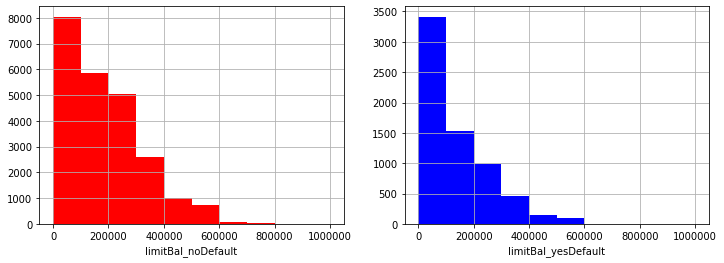

In [20]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(limitBal_noDefault,range=(0,1000000), color = 'r')
pylab.xlabel('limitBal_noDefault')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(limitBal_yesDefault,range=(0,1000000), color = 'b')
pylab.xlabel('limitBal_yesDefault')

pylab.show()

Поскольку речь идет о медианном значении, единственным доступным методом оценки является bootstrap.

In [22]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [25]:
noDef_LB_val=limitBal_noDefault.values
yesDef_LB_val=limitBal_yesDefault.values

Интервальная оценка медианы

In [41]:
np.random.seed(0)

noDefault_median_scores = list(map(np.median, get_bootstrap_samples(noDef_LB_val, 100)))
yesDefault_median_scores = list(map(np.median, get_bootstrap_samples(yesDef_LB_val, 100)))

print("95% confidence interval for the no-default median LIMIT_BAL:",  stat_intervals(noDefault_median_scores, 0.05))
print("95% confidence interval for the yes-default median LIMIT_BAL:",  stat_intervals(yesDefault_median_scores, 0.05))

95% confidence interval for the no-default median LIMIT_BAL: [150000. 150000.]
95% confidence interval for the yes-default median LIMIT_BAL: [80000. 90000.]


Точечная оценка разности медиан

In [49]:
print("difference between medians:", np.median(noDef_LB_val) - np.median(yesDef_LB_val))

difference between medians: 60000.0


Интервальная оценка разности медиан

In [50]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(noDefault_median_scores, yesDefault_median_scores)))

In [51]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [-70000. -60000.]


Убеждаемся, что 95% доверит интервал не содержит 0.

Перейдем к сравнению средних. Выборки независимы.

In [54]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(noDef_LB_val))

95% confidence interval for the mean: [176411.914497, 179787.537651]


In [55]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(yesDef_LB_val))

95% confidence interval for the mean: [127333.653340, 132885.659499]


95% интервалы не пересекаются, проверим еще критерием Манни-Уитни.

In [58]:
stats.mannwhitneyu(noDef_LB_val, yesDef_LB_val)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)

Гипотеза о равенстве средних распределений уверенно отвергается.

## Выводы к заданию 1

1. Гипотеза о равенстве медианных значений кредитного лимита отвергается.
2. Гипотеза о равенстве средних распределений отвергается.
3. Полученные результаты значимы с практической точки зрения. Поскольку размер кредитного лимита - это переменная, значение которой определяется скоринговой моделью банка, эти данные говорят о том, что модель работает лучше, чем абсолютный рандом, и она старается сократить возможные потери банка.

# Задание 2

In [60]:
df_man=df[df.SEX==1]
df_woman=df[df.SEX==2]

In [61]:
sex_noDefault=df_noDefault.SEX
sex_yesDefault=df_yesDefault.SEX

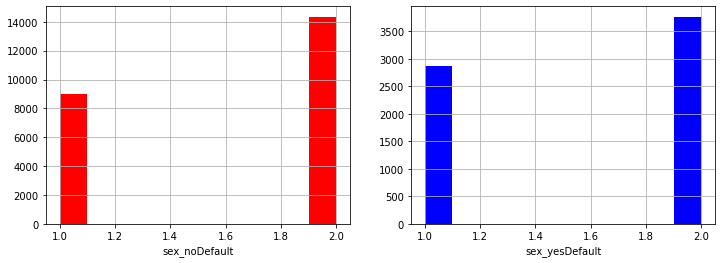

In [63]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(sex_noDefault,color = 'r')
pylab.xlabel('sex_noDefault')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(sex_yesDefault,color = 'b')
pylab.xlabel('sex_yesDefault')

pylab.show()